# Loan Prediction Analysis

This project covers the whole process from problem statement to model development and evaluation:
1. [Project background](#problem)
2. [Exploratory Data Analysis (EDA)](#eda)
3. [Data Pre-processing](#pre)
4. [Model Development and Evaluation](#model)
5. [Conclusion](#conclusion)

# <a name="problem">Part1. Project background</a>

### _Business Problem_
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

### _Translate Business Problem into Data Science / Machine Learning problem_
This is a classification problem where we have to predict whether a loan will be approved or not. Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved (Y) or not approved (N). Another way to frame the problem is to predict whether the loan will likely to default or not, if it is likely to default, then the loan would not be approved, and vice versa. The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features. We need to develop a model using the features to predict the target variable.

# <a name="eda">Part2. Exploratory Data Analysis (EDA)</a>

In [59]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from sklearn.discriminant_analysis import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
warnings.filterwarnings("ignore")

In [2]:
#data loading 
# Loading dataset
train = pd.read_csv('train.csv')
predict = pd.read_csv('test.csv')

In [3]:
# make a copy to prevent hampering the original datasets
train_original = train.copy()
predict_original = predict.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
predict.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**The dataset consists of the following columns:**

- **Loan_ID :** Unique Loan ID<br>
- **Gender :** Male/ Female<br>
- **Married :** Applicant married (Y/N)<br>
- **Dependents :** Number of dependents <br>
- **Education :** Applicant Education (Graduate/ Under Graduate)<br>
- **Self_Employed :** Self employed (Y/N)<br>
- **ApplicantIncome :** Applicant income<br>
- **CoapplicantIncome :** Coapplicant income<br>
- **LoanAmount :** Loan amount in thousands of dollars<br>
- **Loan_Amount_Term :** Term of loan in months<br>
- **Credit_History :** credit history meets guidelines yes or no<br>
- **Property_Area :** Urban/ Semi Urban/ Rural<br>
- **Loan_Status :** Loan approved (Y/N) this is the target variable<br>
Note: there is no 'Loan_Status' feature in dataset'predict'. 

In [6]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0] + predict.shape[0])

0.6258919469928644

In [7]:
#check for missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## 2.1 Univariate analysis

**For numerical features** ,we can use Probability Density Functions(PDF) to look at the distribution of the numerical variables.

**For categorical features** ,frequency tables or bar plots can be used to calculate the number of each category in a particular variable. 


#### 2.1.1 Categorical Features

In [9]:
#frequency table with percentage
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [10]:
categorical_var = ['Gender', 'Married', 'Dependents', 
                   'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

def visualize_categorical_data(df, columns, nrows, ncols, figsize):
    """
    Creates a grid of pie charts to visualize the distribution of categorical features.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the categorical features to be plotted.
    columns : list
        A list of column names corresponding to the categorical features to be plotted.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).

    Returns:
    --------
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):

        # Each category value count
        val_count = df[column].value_counts()

        # Create a pie chart
        axs.flat[i].pie(val_count, labels=val_count.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{column} Distribution')

    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show() 

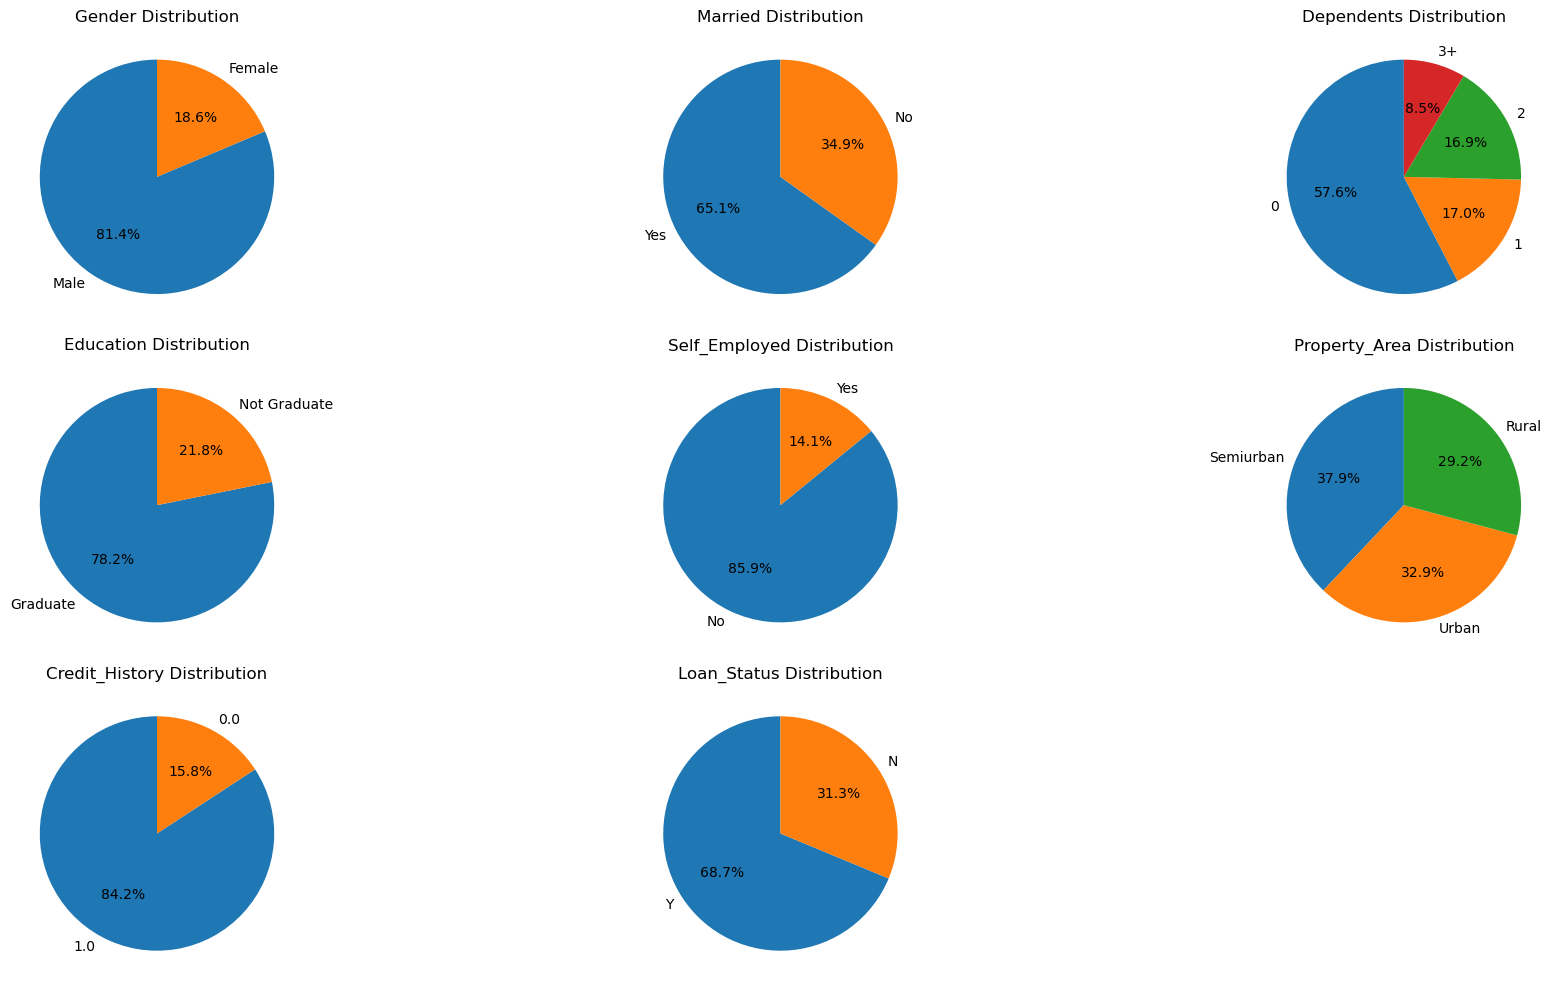

In [11]:
visualize_categorical_data(train, categorical_var, 3, 3, (20, 10))

In [12]:
train['Loan_Amount_Term'].value_counts(sort = True)

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

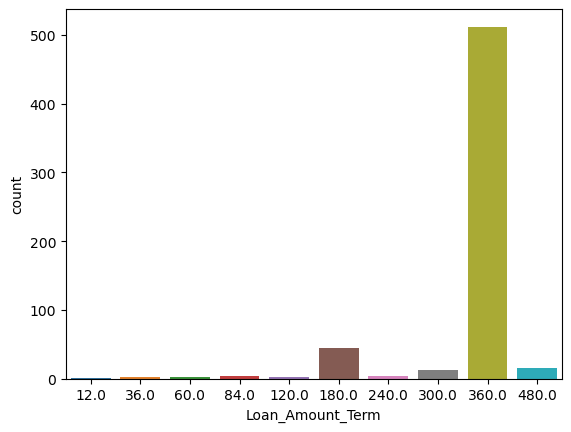

In [13]:
sns.countplot(x='Loan_Amount_Term', data=train)

#### 2.1.2 Numerical Features

In [14]:
numerical_var = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

def visualize_numerical_data(df, columns, nrows, ncols, figsize, plot_type='hist'):
    """
    Visualize the distribution of numerical features.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the categorical features to be plotted.
    columns : list
        A list of column names corresponding to the categorical features to be plotted.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).
    plot_type : str, optional
        The type of plot to create for each feature. Valid options are 'hist' (default), 
        'box', and 'violin'.

    Returns:
    --------
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):
        if plot_type=='hist':
            sns.histplot(data=df[column],kde=True, stat='count',ax = axs.flat[i])
            #sns.histplot(data=df, x=column, ax=axs.flat[i], kde=True, stat='count')  
        elif plot_type == 'box':
            sns.boxplot(data=df[column],ax = axs.flat[i])
        elif plot_type == 'violin':
            sns.violinplot(data=df[column],ax = axs.flat[i])
        # Set a title for each subplot
        axs.flat[i].set_title(f'{column} Distribution')

    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show() 

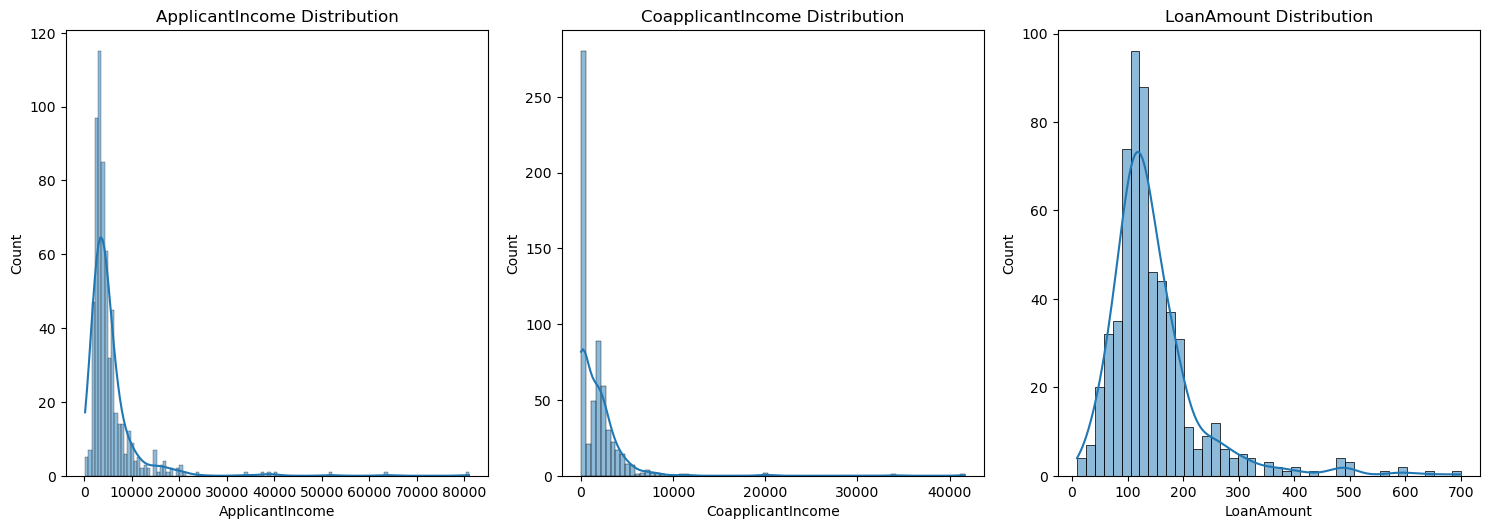

In [15]:
visualize_numerical_data(train,numerical_var, nrows = 2, ncols = 3, figsize = (15,10), plot_type='hist')

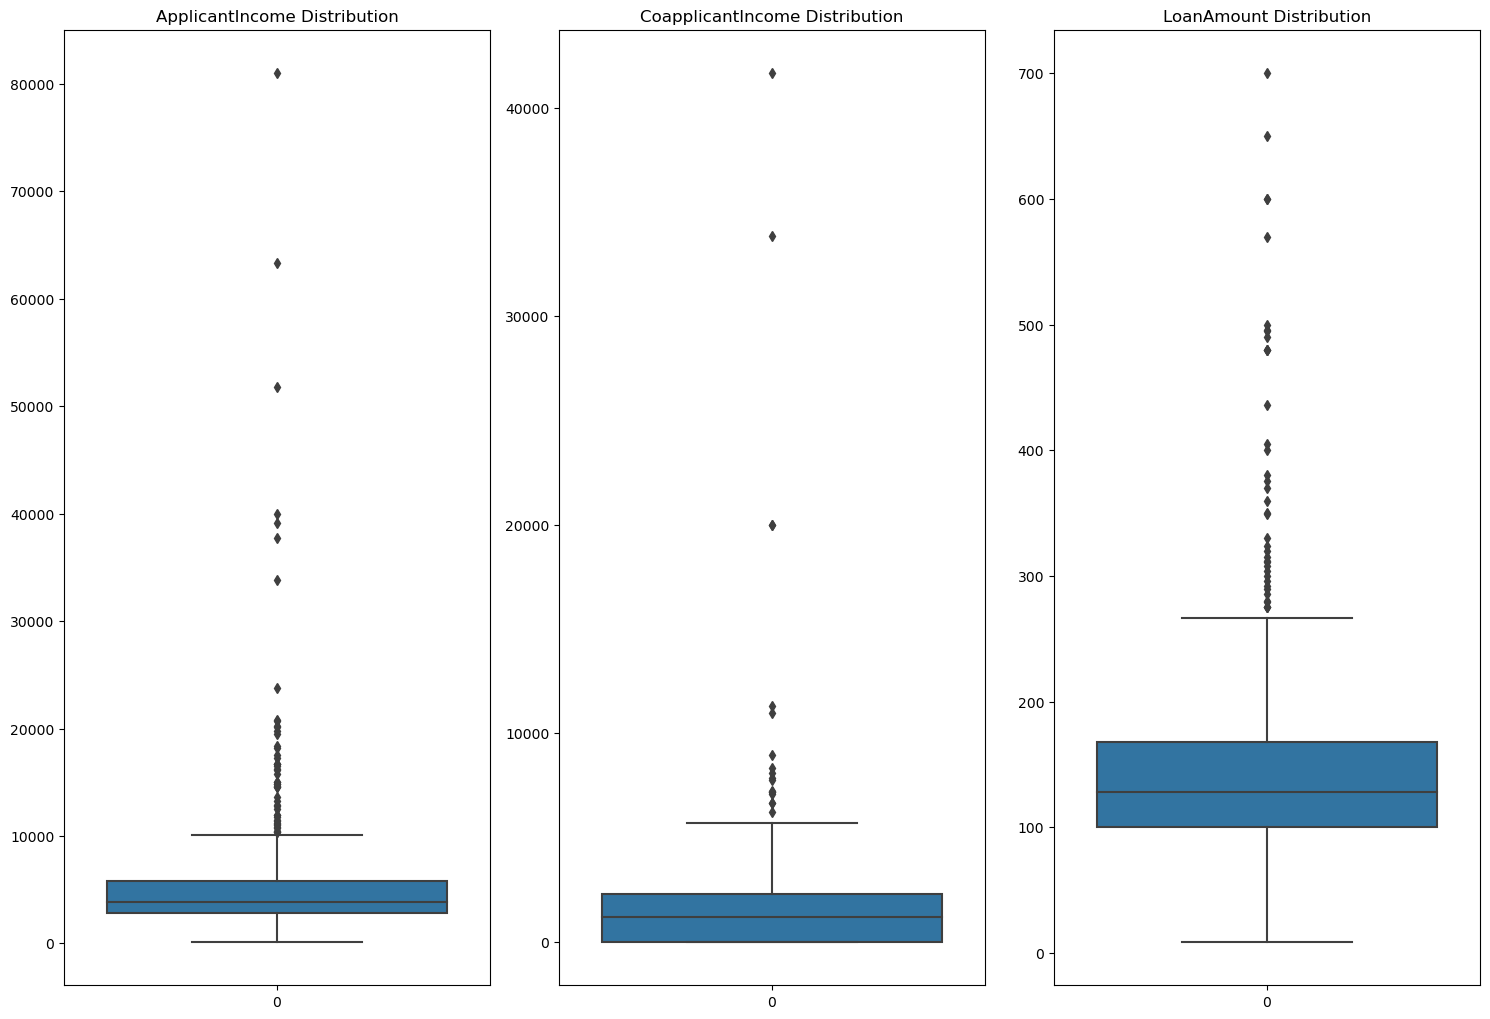

In [16]:
visualize_numerical_data(train,numerical_var, nrows = 2, ncols = 3, figsize = (15,20), plot_type='box')

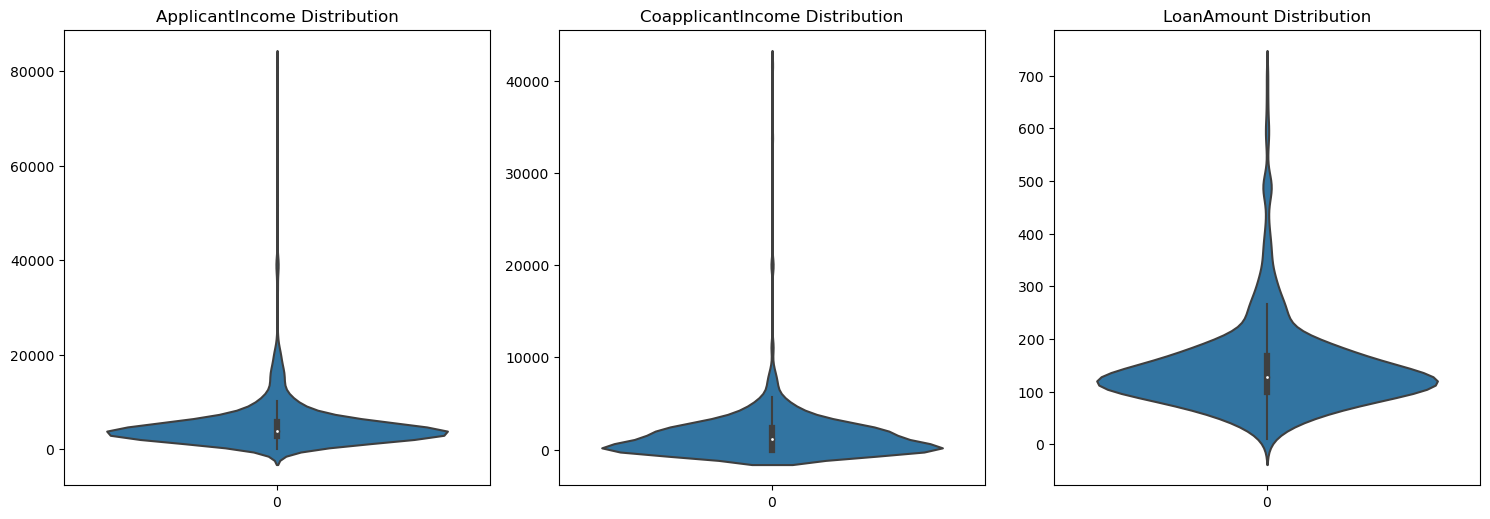

In [17]:
visualize_numerical_data(train,numerical_var, nrows = 2, ncols = 3, figsize = (15,10), plot_type='violin')

#### Insights from the univariate analysis.

- 81.4% of applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Most of the applicants don’t have dependents.
- 78.2% of the applicants are graduates.
- About 15% of applicants in the dataset are self-employed.
- About 85% of the applicants chosed the loan on 360 months.
- 84.2% of applicants have repaid their debts.
- Most of the applicants are from semi-urban areas.
- 68.7% of the applicants got the approval.
- The applicant income and coapplicant income has a similiar extremely left-skewed distribution.
- The loan amount is fairly normal but contains outliers.

## 2.2 Bivariate Analysis

Bivariate Analysis is used in this section to know how well each feature correlates with Loan Status.

### 2.2.1 Categorical Features vs Target Variable

In [18]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [19]:
Gender.sum(axis='columns').astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

<Axes: xlabel='Gender'>

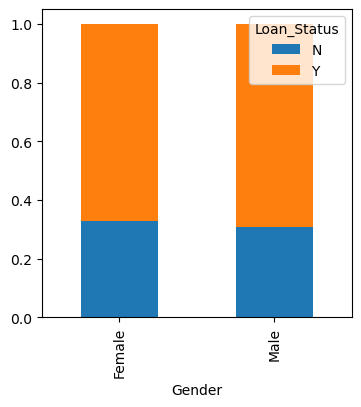

In [20]:
Gender.div(Gender.sum(axis='columns').astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [21]:
def visualize_categorical_with_target(df, columns, target, nrows, ncols, figsize, plot_type='stackbar'):
    """
    Visualize categorical features with target variable.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the categorical features to be plotted.
    columns : list
        A list of column names corresponding to the categorical features to be plotted.
    target : str
        The column name of the target variable in the dataframe.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).
    plot_type: str
        stackbar or countbar
    Returns:
    --------
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):
        if plot_type == 'stackbar' :
            temp = pd.crosstab(df[column],df[target]) 
            temp.div(temp.sum(axis='columns').astype(float), axis=0).plot(kind="bar", stacked=True, ax = axs.flat[i])
        elif plot_type == 'countbar':
            sns.countplot(x=column, hue=target, data=df, ax=axs.flat[i])
        # Set a title for each subplot
            axs.flat[i].set_title(f'{column} with {target} Distribution')

    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show() 

In [22]:
categorical_var = ['Gender','Married', 'Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Amount_Term']

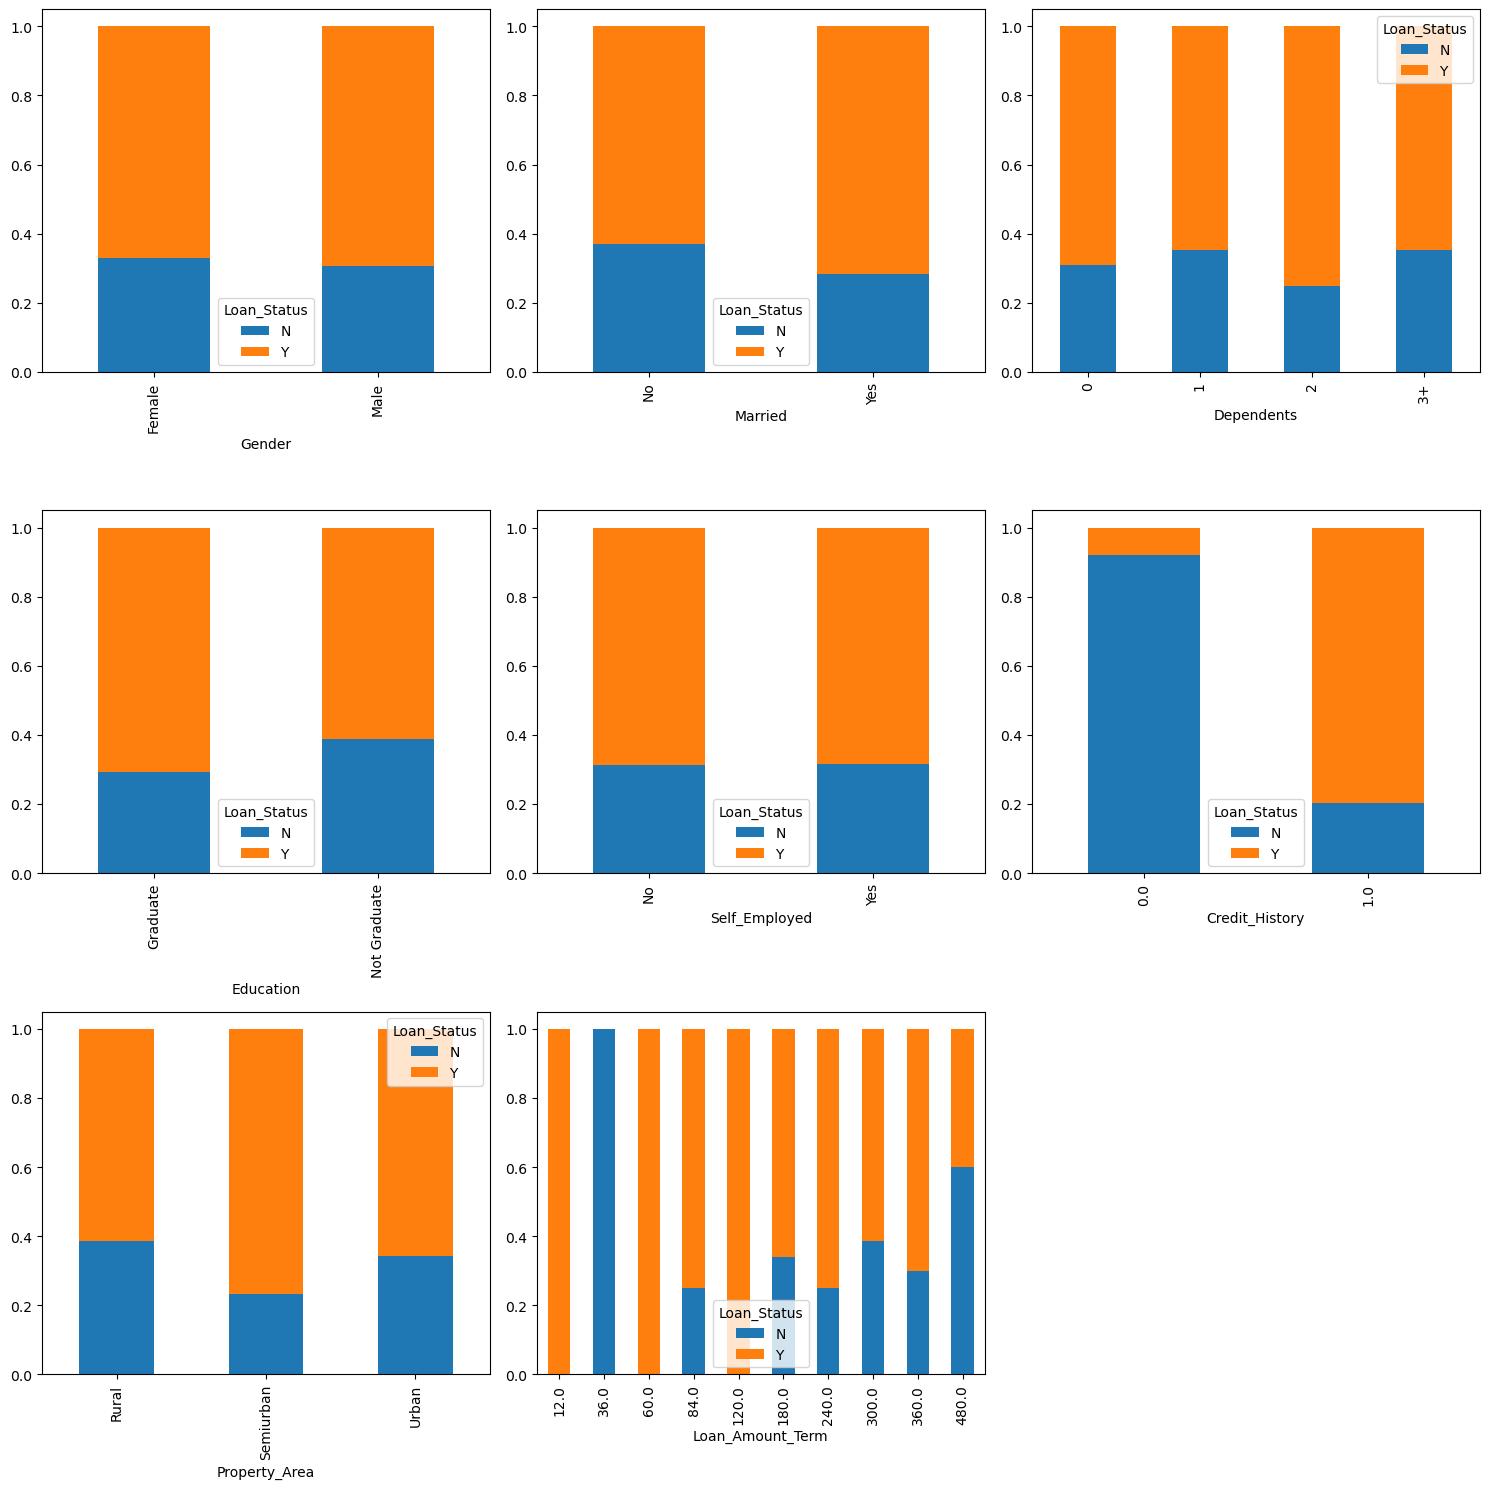

In [23]:
visualize_categorical_with_target(train, categorical_var, 'Loan_Status', 3, 3, figsize = (15,15),plot_type='stackbar')

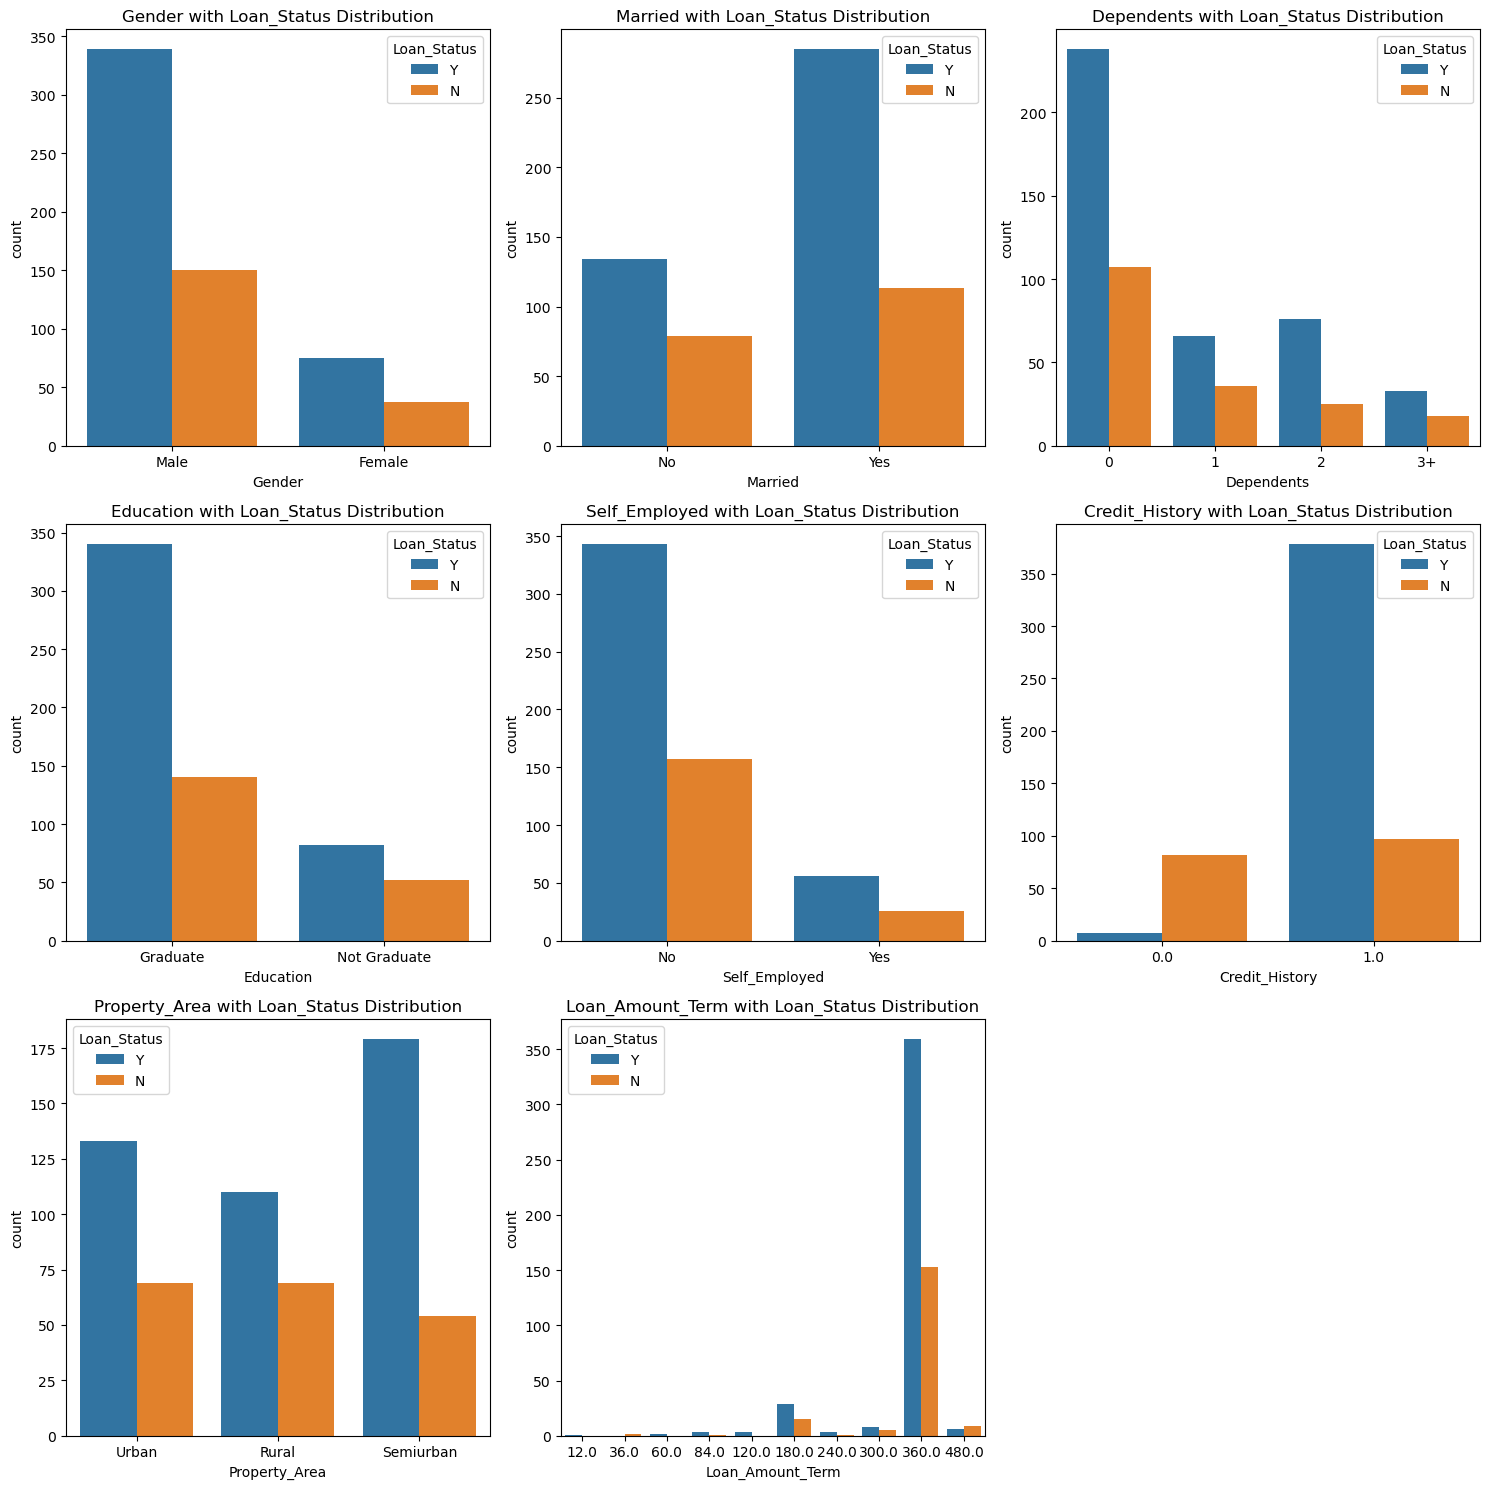

In [24]:
visualize_categorical_with_target(train, categorical_var, 'Loan_Status', 3, 3, figsize = (15,15),plot_type='countbar')

In [25]:
def visualize_numerical_with_target(df, columns, target, nrows, ncols, figsize, plot_type='box'):
    """
    Visualize categorical features with target variable.

    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe containing the categorical features to be plotted.
    columns : list
        A list of column names corresponding to the categorical features to be plotted.
    target : str
        The column name of the target variable in the dataframe.
    nrows : int
        The number of rows in the subplot grid.
    ncols : int
        The number of columns in the subplot grid.
    figsize : tuple
        The size of the plot figure in inches, specified as a tuple (width, height).
    plot_type: str
        box or violin
    --------
    None
        Displays the plot figure.
    """

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    for i, column in enumerate(columns):
        if plot_type == 'box':
            sns.boxplot(x=target, y=column, data=df, ax=axs.flat[i])
        elif plot_type == 'violin':
            sns.violinplot(x=target, y=column, data=df, ax=axs.flat[i])
        # Set a title for each subplot
        axs.flat[i].set_title(f'{column} with {target} Distribution')

    # Remove empty subplots
    if len(columns) < nrows * ncols:
        for i in range(len(columns), nrows * ncols):
            fig.delaxes(axs.flat[i])

    fig.tight_layout()
    plt.show() 

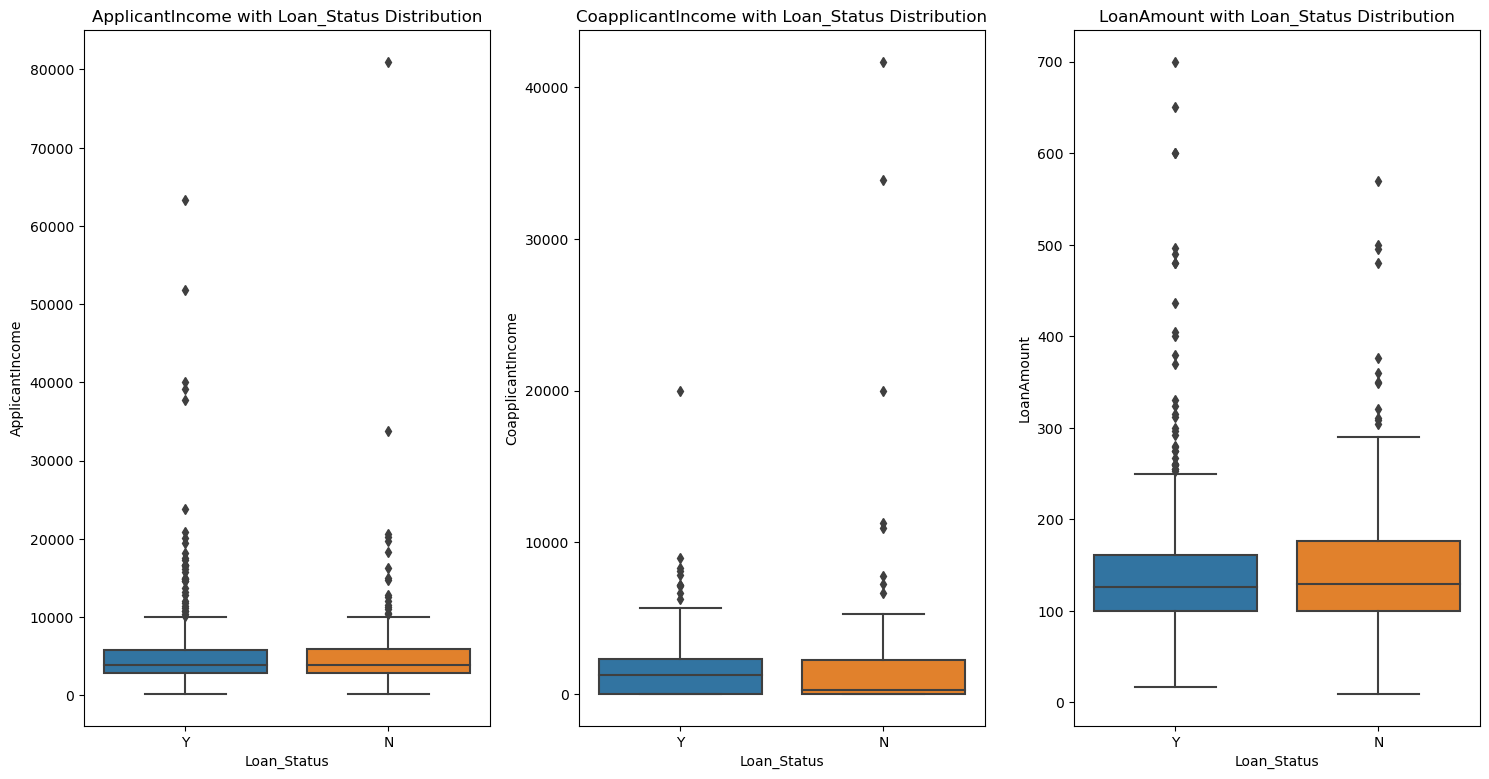

In [26]:
visualize_numerical_with_target(train, numerical_var, 'Loan_Status', 2, 3, figsize = (15,15), plot_type='box')

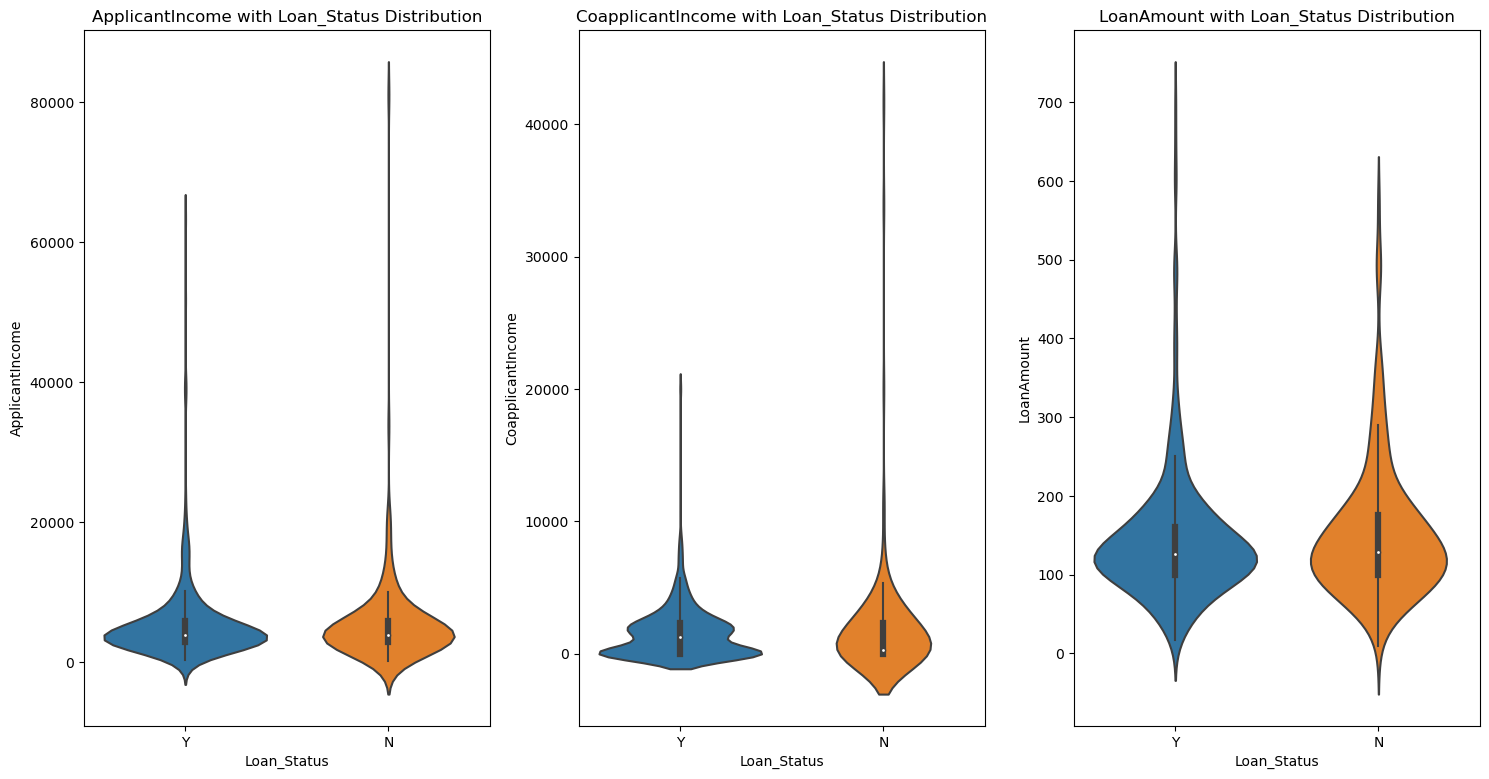

In [27]:
visualize_numerical_with_target(train, numerical_var, 'Loan_Status', 2, 3, figsize = (15,15), plot_type='violin')

In [28]:
#caculate the total income 
train['Income_total'] = train['ApplicantIncome'] + train["CoapplicantIncome"]
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_total
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


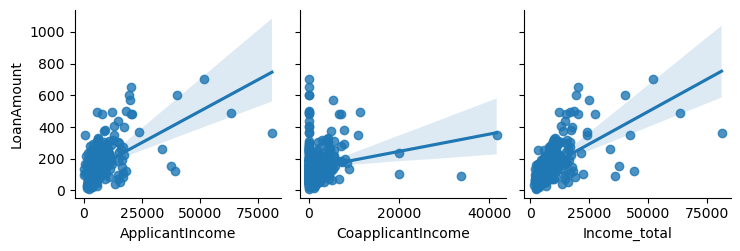

In [29]:
# Let's see how income are related with loanamount using Scatter Plot
sns.pairplot(train,
             x_vars = ["ApplicantIncome","CoapplicantIncome","Income_total"],
             y_vars = ["LoanAmount"],
             kind = 'reg')


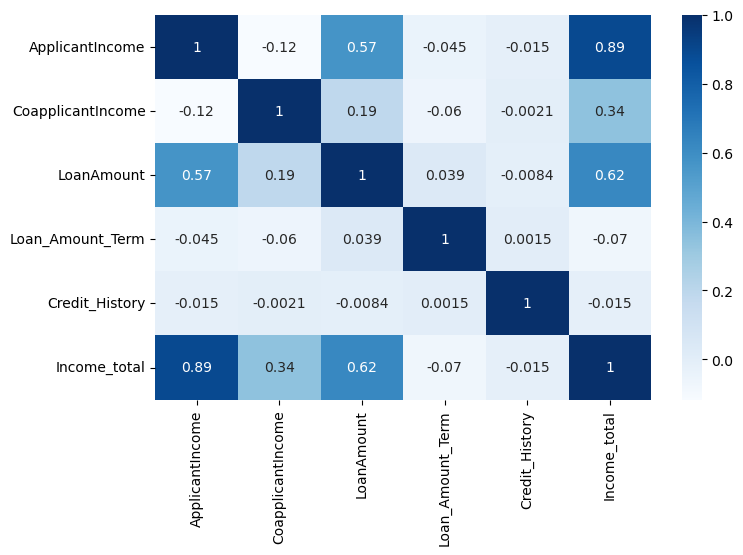

In [30]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(), cmap='Blues',annot = True)
plt.show()

###### Insights:
1.the Loan Amount and Applicant Income(CoapplicantIncome\Total Income) are linearly correlated: Higher the Applicant Income Higher the Loan Amount.
2.Gender and Self_Employed features don’t seem to have any impact on the loan status.
3.Married applicants are more likely to be approved for loans.
4.Applicants with 1 or 3+ dependents are less likely to be approved for loans.
5.Applicants with credit history as 1 are more likely to be approved.
6.Applicants who are not graduates are less likely to be approved.
7.Applicants from Semiurban areas are more likely to be approved for loans.

# <a name="pre">Part3. Data Preprocessing</a>

##### Categorical Features Encoding

In [96]:
train.drop(columns = ['Income_total'], axis = 1,inplace = True)

In [31]:
train.drop(columns = ['Loan_ID'], axis = 1, inplace = True)
predict.drop(['Loan_ID'], axis=1, inplace=True)

In [32]:
# Replace the ' 's with NaN
train = train.replace(" ",np.NaN)
train['Dependents'].replace('3+', '3', inplace=True)
predict['Dependents'].replace('3+', '3', inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [33]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_total          0
dtype: int64

In [34]:
for column in train.columns:
    if train[column].dtype == 'object' or train[column].name == 'Loan_Amount_Term':
        print(f'{column} : {train[column].unique()}')

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Loan_Amount_Term : [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Property_Area : ['Urban' 'Rural' 'Semiurban']


In [97]:
df = train.copy()

In [98]:
# encode categorical column in df
for column in df.columns:
    if df[column].dtype == 'object':
        series = df[column]
        label_encoder = LabelEncoder()
        df[column] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index)


In [99]:
df_2 = predict.copy()
# encode categorical column in predict
for column in df_2.columns:
    if df_2[column].dtype == 'object':
        series = df_2[column]
        label_encoder = LabelEncoder()
        df_2[column] = pd.Series(
        label_encoder.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index)
 

In [100]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

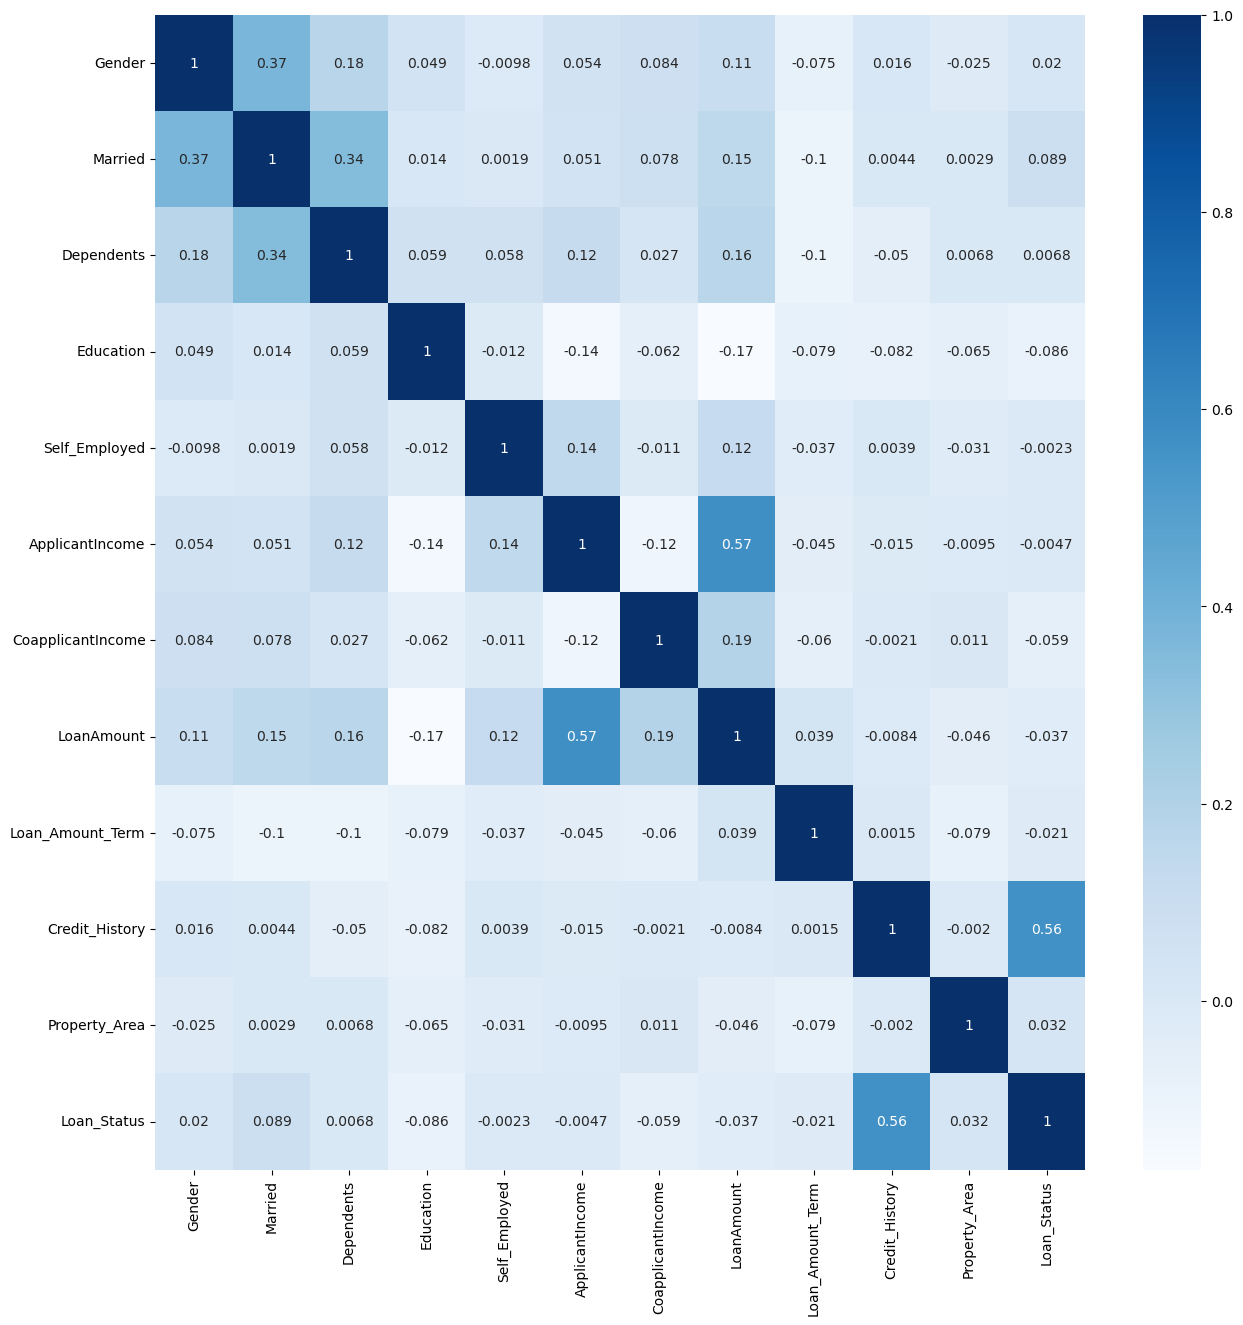

In [101]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues',fmt='.2g',annot = True)

##### Impute missing values with KNNImputer

In [102]:
# impute missing values in train datasets
imputer = KNNImputer(n_neighbors=10)
df = pd.DataFrame(np.round(imputer.fit_transform(df)),columns = df.columns)

In [103]:
# impute missing values in predict datasets
imputer = KNNImputer(n_neighbors=10)
df_2 = pd.DataFrame(np.round(imputer.fit_transform(df_2)),columns = df_2.columns)

In [104]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [105]:
categorical_var = ['Gender', 'Married', 'Dependents', 
                   'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']
for column in categorical_var:
    print(f'{column} : {df[column].unique()}')

Gender : [1. 0.]
Married : [0. 1.]
Dependents : [0. 1. 2. 3.]
Education : [0. 1.]
Self_Employed : [0. 1.]
Property_Area : [2. 0. 1.]
Credit_History : [1. 0.]
Loan_Status : [1. 0.]


In [106]:
for column in categorical_var:
    print(f'{column} : {train[column].unique()}')

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Credit_History : [ 1.  0. nan]
Loan_Status : [1 0]


In [107]:
df_2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# <a name="model">Part4. Model Development and Evaluation</a>

In [108]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,155.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0


In [109]:
# Define the y (target) variable
y = df['Loan_Status']

# Define the X (predictor) variables
X = df.copy()
X = X.drop('Loan_Status', axis=1)

In [110]:
#split train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [111]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (429, 11)
y_train shape (429,)
X_test shape (185, 11)
y_test shape (185,)


#### 4.1 Logistic Regression (LR)

In [112]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)

In [113]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, lr_prediction))
print('Precision:', '%.3f' % precision_score(y_test, lr_prediction))
print('Recall:', '%.3f' % recall_score(y_test, lr_prediction))
print('F1 Score:', '%.3f' % f1_score(y_test, lr_prediction))

Accuracy: 0.795
Precision: 0.766
Recall: 0.983
F1 Score: 0.861


In [114]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, lr_prediction, labels = model.classes_)

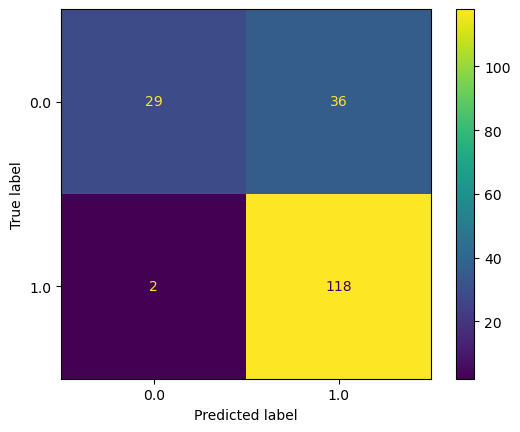

In [115]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)
# Display the confusion matrix
disp.plot()

#### 4.2 K-Nearest Neighbors(KNN)

In [116]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [117]:
pred = knn.predict(X_test)

In [118]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, pred))
print('Precision:', '%.3f' % precision_score(y_test, pred))
print('Recall:', '%.3f' % recall_score(y_test, pred))
print('F1 Score:', '%.3f' % f1_score(y_test, pred))

Accuracy: 0.649
Precision: 0.649
Recall: 1.000
F1 Score: 0.787


In [119]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels = knn.classes_)

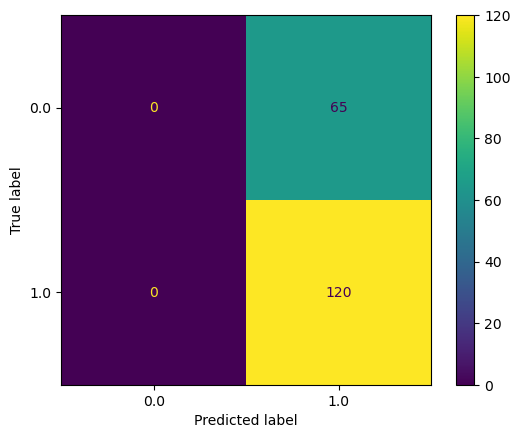

In [120]:
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = knn.classes_)
# Display the confusion matrix
disp.plot()

#### 4.3 Naive Bayes

In [121]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [122]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.789
Precision: 0.772
Recall: 0.958
F1 Score: 0.855


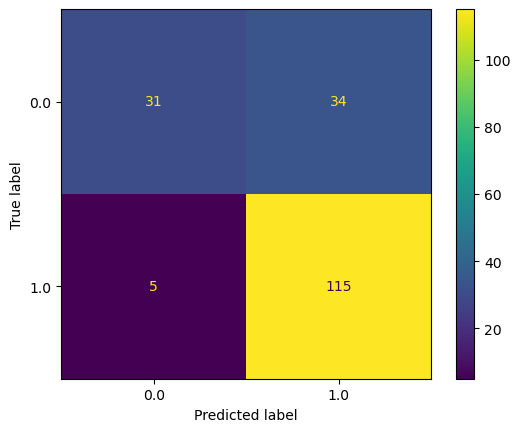

In [123]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_preds, labels = gnb.classes_)
# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = gnb.classes_)
# Display the confusion matrix
disp.plot()

In [124]:
#scaling predictor variables to see performance
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler
scaler = MinMaxScaler()
# Fit the scaler to the training data
scaler.fit(X_train)
# Scale the training data
X_train = scaler.transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [125]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [126]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.795
Precision: 0.773
Recall: 0.967
F1 Score: 0.859


#### 4.4 Support Vector Machine

In [127]:
from sklearn import svm

In [128]:
# Create an SVM model with a linear kernel:
model = svm.SVC(kernel='linear')

model.fit(X_train,y_train)

SVC(kernel='linear')

In [129]:
#Evaluate using the testing data
test_predict=model.predict(X_test)

In [130]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, test_predict))
print('Precision:', '%.3f' % precision_score(y_test,test_predict))
print('Recall:', '%.3f' % recall_score(y_test, test_predict))
print('F1 Score:', '%.3f' % f1_score(y_test, test_predict))

Accuracy: 0.795
Precision: 0.766
Recall: 0.983
F1 Score: 0.861


#### 4.5 Decision Trees

In [131]:
#baseline decision tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
ypred_tree = tree.predict(X_test)


In [132]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, ypred_tree))
print('Precision:', '%.3f' % precision_score(y_test, ypred_tree))
print('Recall:', '%.3f' % recall_score(y_test, ypred_tree))
print('F1 Score:', '%.3f' % f1_score(y_test, ypred_tree))

Accuracy: 0.643
Precision: 0.725
Recall: 0.725
F1 Score: 0.725


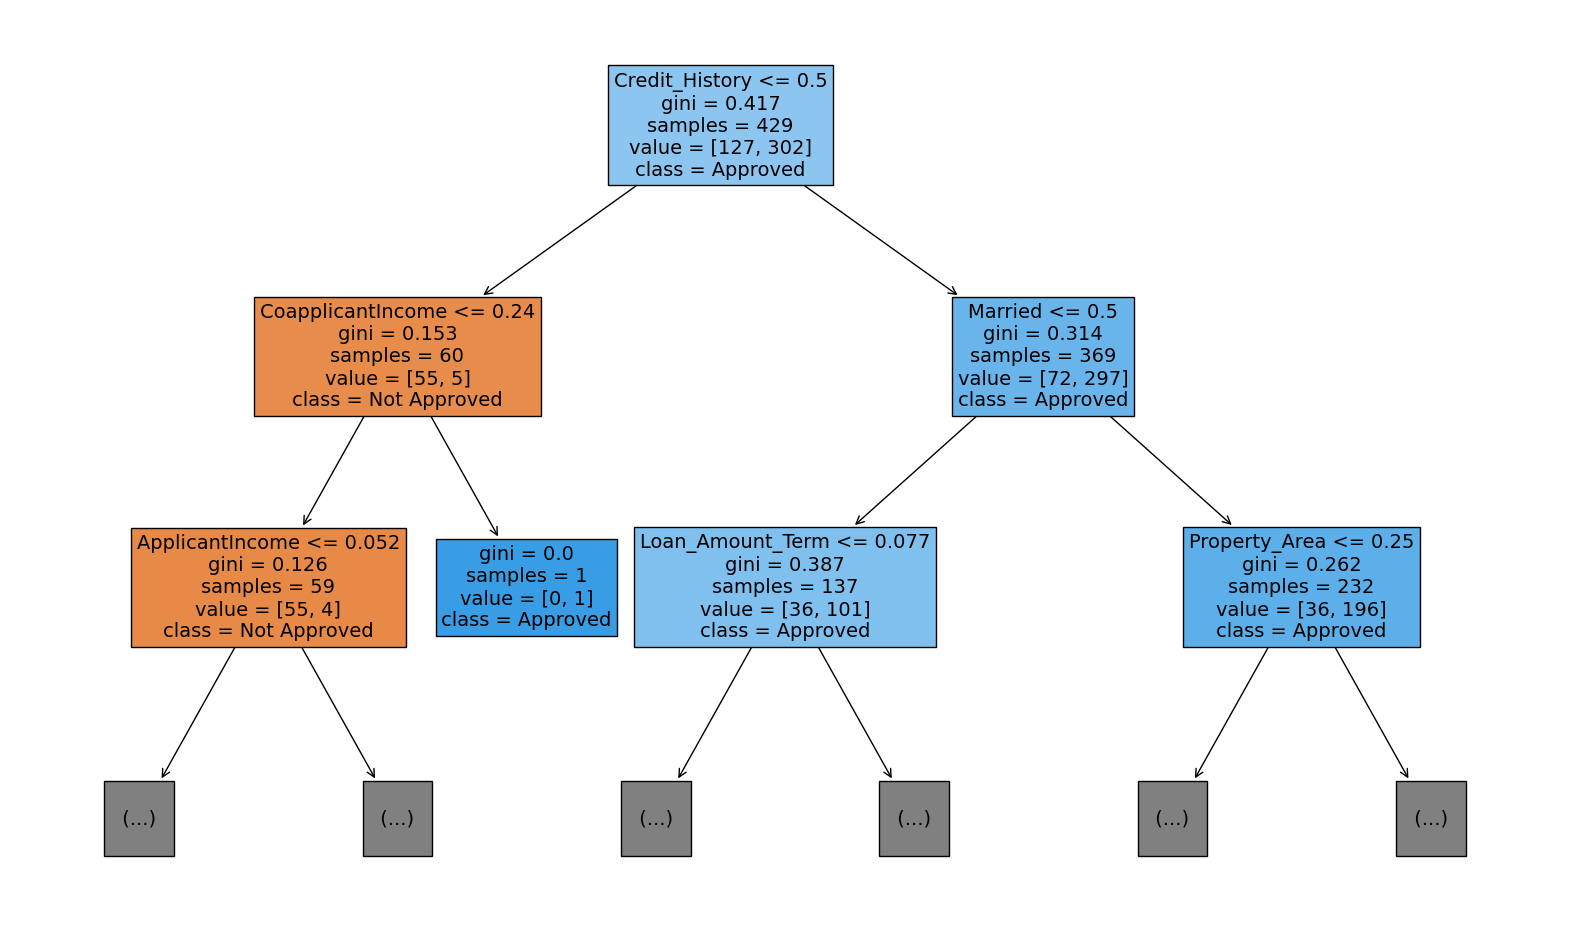

In [134]:
from sklearn.tree import plot_tree
# Plot the tree
plt.figure(figsize=(20,12))
plot_tree(tree, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'Not Approved', 1:'Approved'}, filled=True);
plt.show()

#### 4.6  hyperparameter tuning Decision Tree

In [156]:
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
             'min_samples_leaf': [2, 5, 10, 20, 50]}

In [157]:
# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [158]:
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 42)

In [159]:
# Instantiate the GridSearch
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="accuracy")

# Fit the model
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50],
                         'min_samples_leaf': [2, 5, 10, 20, 50]},
             refit='accuracy',
             scoring={'precision', 'accuracy', 'f1', 'recall'})

In [160]:
# Examine the best model from GridSearch
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

In [162]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                        'F1': [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [163]:
# Call the function on our model
result_table = make_results("Tuned Decision Tree", clf)

In [164]:
# View the results
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.885277,0.983497,0.805028,0.820465


In [189]:
DT_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

Text(0, 0.5, 'Importance')

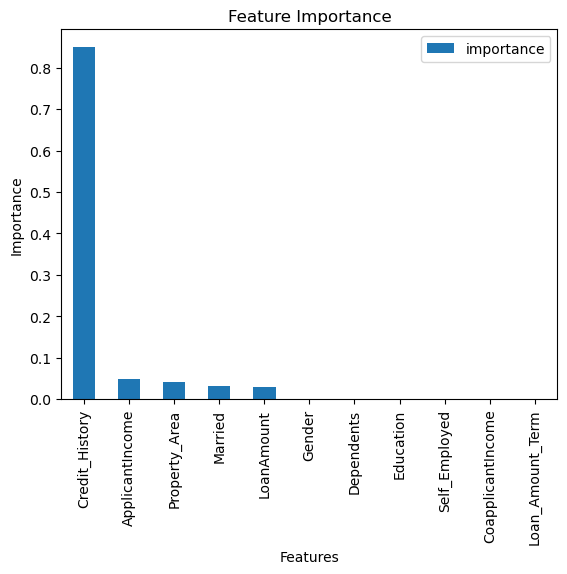

In [190]:
# Feature importance
feature_importance = pd.DataFrame({'feature': train.drop('Loan_Status', axis=1).columns,
'importance': DT_model.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False, inplace=True)
feature_importance.plot.bar(x='feature', y='importance')

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

#### 4.7 Random Forest

In [170]:
%%time

rf = RandomForestClassifier()

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [150,300,500]
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

CPU times: total: 0 ns
Wall time: 0 ns


In [171]:
# Fit the model
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [150, 300, 500]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [172]:
# Examine the best model from GridSearch
rf_cv.best_estimator_

RandomForestClassifier(max_features=2, min_samples_split=3, n_estimators=300)

In [173]:
# Make a results table for the rf_cv model using above function
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.885499,0.973607,0.812196,0.822791


#### 4.8 XGBoost

In [176]:
import sys
!{sys.executable} -m pip install xgboost

     --------------------------------------- 99.7/99.7 MB 23.3 MB/s eta 0:00:00


In [177]:
# This is the classifier
from xgboost import XGBClassifier
# This is the function that helps plot feature importance 
from xgboost import plot_importance

In [178]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0) 

cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }    

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [179]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 10min 48s
Wall time: 2min


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [180]:
# Create xgb model results table
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.873927,0.953661,0.807298,0.806512


#### 4.9 ANN 

In [191]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_ann = sc.fit_transform(X_train)
X_test_ann = sc.transform(X_test)

In [194]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [196]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train_ann, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
43/43 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.7016
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.7040
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.7040
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 0.6082 - accuracy: 0.7040
Epoch 5/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7040
Epoch 6/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7040
Epoch 7/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7040
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7040
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7040
Epoch 10/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7040
Epoch 11/

43/43 [==============================] - 0s 2ms/step - loss: 0.4648 - accuracy: 0.8205
Epoch 84/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4641 - accuracy: 0.8205
Epoch 85/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.8205
Epoch 86/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8205
Epoch 87/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8205
Epoch 88/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8205
Epoch 89/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8205
Epoch 90/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8205
Epoch 91/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.8205
Epoch 92/100
43/43 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8205
Epoch 93/100


In [197]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_ann)
y_pred = (y_pred > 0.5)


6/6 [==============================] - 0s 2ms/step


In [200]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_pred))
print('Precision:', '%.3f' % precision_score(y_test, y_pred))
print('Recall:', '%.3f' % recall_score(y_test, y_pred))
print('F1 Score:', '%.3f' % f1_score(y_test, y_pred))

Accuracy: 0.795
Precision: 0.766
Recall: 0.983
F1 Score: 0.861


# <a name="conclusion">Part5. Conclusion</a>

After trying and testing 9 different algorithms, the best accuracy score is achieved by Random Forest (0.823), followed by Tuned Decision Tree (0.82), and Baseline Decision Tree performed the worst (0.643).  Compared to using default parameter values, GridSearchCV helped improved the model's mean validation accuracy by providing the optimized values for the model's hyperparameters.